Load the CSV file


In [3]:
import pandas as pd

data = pd.read_csv('mitbih_database/100.csv')

# print the first 5 samples
data.head() 


,'sample #','MLII','V5'
0,0,995,1011
1,1,995,1011
2,2,995,1011
3,3,995,1011
4,4,995,1011


In [4]:
# print the last 5 samples
data.tail()

,'sample #','MLII','V5'
649995,649995,1009,928
649996,649996,935,942
649997,649997,889,951
649998,649998,871,957
649999,649999,768,1024


The dataset contains 24 hour (86400) two channel ambulatory ECG recordings. The ambulatory ECG machine uses a 2-lead ECG system. By convention the 12-lead ECG system is the Gold-standard. 

However, because patients are usually rushed to the hospital in an ambulance. Health professionals usually need the most vital metrics. The MLII Channel and V5 channel are used.

The recordings were digitized at 360 samples per second per channel with 11-bit resolution over a 10 mV range. 

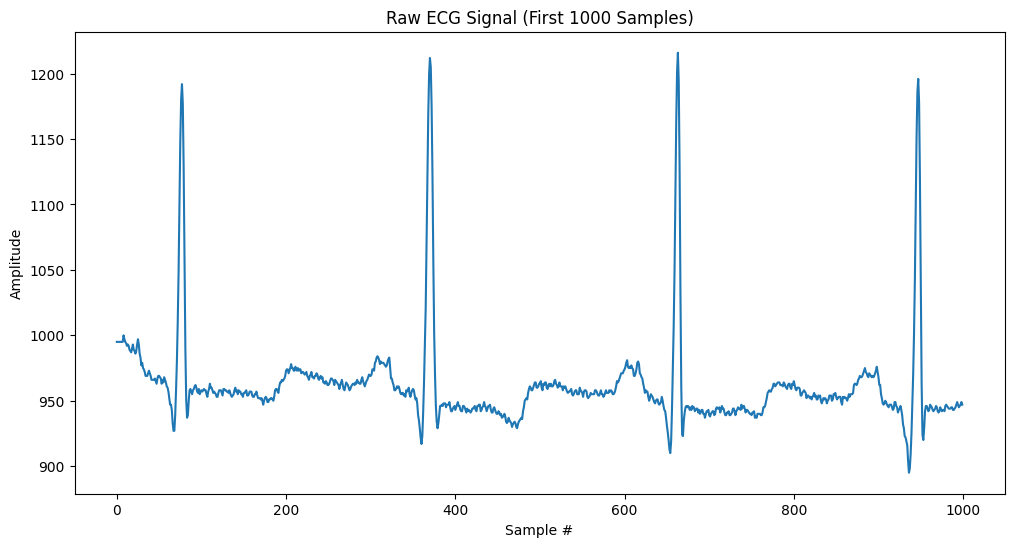

In [21]:
import matplotlib.pyplot as plt

# Plot a segment of the raw ECG signal
plt.figure(figsize=(12, 6))
plt.plot(data['\'MLII\''].iloc[:1000])  # Plotting the first 1000 samples
plt.title('Raw ECG Signal (First 1000 Samples)')
plt.xlabel('Sample #')
plt.ylabel('Amplitude')
plt.show()

Sample Analysis

In [5]:
import neurokit2 as nk

In [8]:
# extracting the ECG signal from the MLII column

ecg_signal = data['\'MLII\'']

ecg_signal.head()

0    995
1    995
2    995
3    995
4    995
Name: 'MLII', dtype: int64

In [13]:
# Preprocess the ECG signal
# Clean an ECG signal to remove noise and improve peak-detection accuracy

ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=360 )

ecg_cleaned

array([  8.32848852,   8.42111632,   8.61581682, ..., 132.65735569,
        75.31841978,  14.60397029])

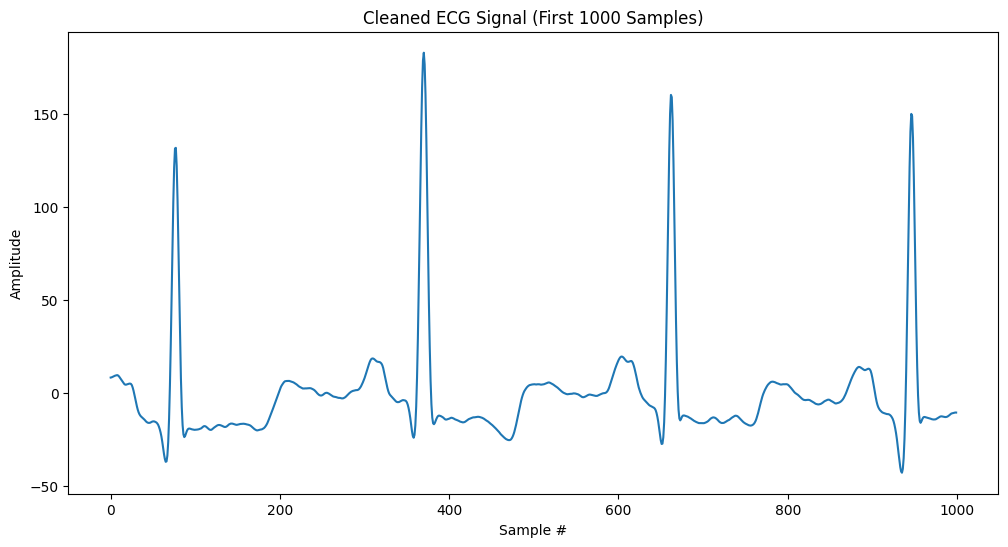

In [22]:
# Plot the cleaned ECG signal
plt.figure(figsize=(12, 6))
plt.plot(ecg_cleaned[:1000])  # Plotting the first 1000 samples
plt.title('Cleaned ECG Signal (First 1000 Samples)')
plt.xlabel('Sample #')
plt.ylabel('Amplitude')
plt.show()

In [29]:
# Detect R-peaks

ecg_peaks, _ = nk.ecg_peaks(ecg_cleaned, sampling_rate=360, method='neurokit')

# extract R-peaks indexes
r_peaks = ecg_peaks['ECG_R_Peaks']

r_peaks.head(1000)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: ECG_R_Peaks, Length: 1000, dtype: int64

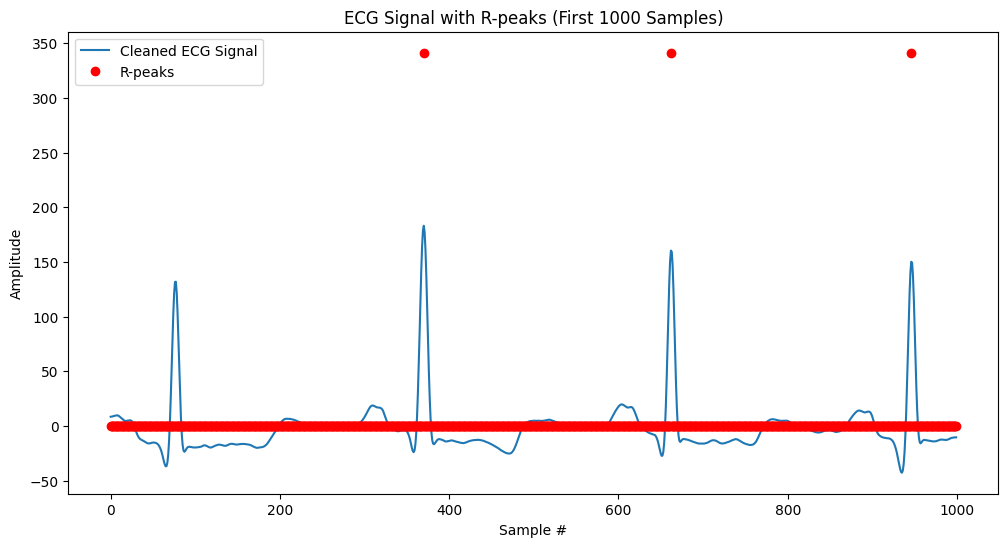

In [24]:
# Plot a segment of the ECG signal with R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_cleaned[:1000], label='Cleaned ECG Signal')
plt.plot(r_peaks[:1000] * ecg_cleaned.max(), 'ro', label='R-peaks')  # Scaling R-peaks for visualization
plt.legend()
plt.title('ECG Signal with R-peaks (First 1000 Samples)')
plt.xlabel('Sample #')
plt.ylabel('Amplitude')
plt.show()


In [25]:
# Check the first few values of the R-peaks array
print(r_peaks.head(20))

# Check for any R-peaks detected
print(r_peaks[r_peaks > 0])


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: ECG_R_Peaks, dtype: int64
370       1
662       1
946       1
1231      1
1515      1
         ..
648733    1
648978    1
649231    1
649484    1
649733    1
Name: ECG_R_Peaks, Length: 2270, dtype: int64


In [26]:
# Check the indices where R-peaks are detected
r_peaks_indices = r_peaks[r_peaks > 0].index

print(r_peaks_indices)


Index([   370,    662,    946,   1231,   1515,   1809,   2044,   2402,   2706,
         2997,
       ...
       647414, 647672, 647935, 648203, 648477, 648733, 648978, 649231, 649484,
       649733],
      dtype='int64', length=2270)


In [31]:
# Compute HRV indices
hrv_time = nk.hrv_time(r_peaks_indices, sampling_rate=360)
hrv_freq = nk.hrv_frequency(r_peaks_indices, sampling_rate=360)
hrv_nonlinear = nk.hrv_nonlinear(r_peaks_indices, sampling_rate=360)

# Combine all HRV indices into a single DataFrame
hrv_indices = pd.concat([hrv_time, hrv_freq, hrv_nonlinear], axis=1)

# Display HRV indices
hrv_indices


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,794.969639,51.362165,20.006257,44.010633,18.70864,46.265128,15.906135,48.197617,66.453087,66.467721,...,1.502313,5.855793,1.020835,0.736993,1.394589,1.821705,0.919547,1.989944,2.353774,0.751705


91 features or variables in this ECG data

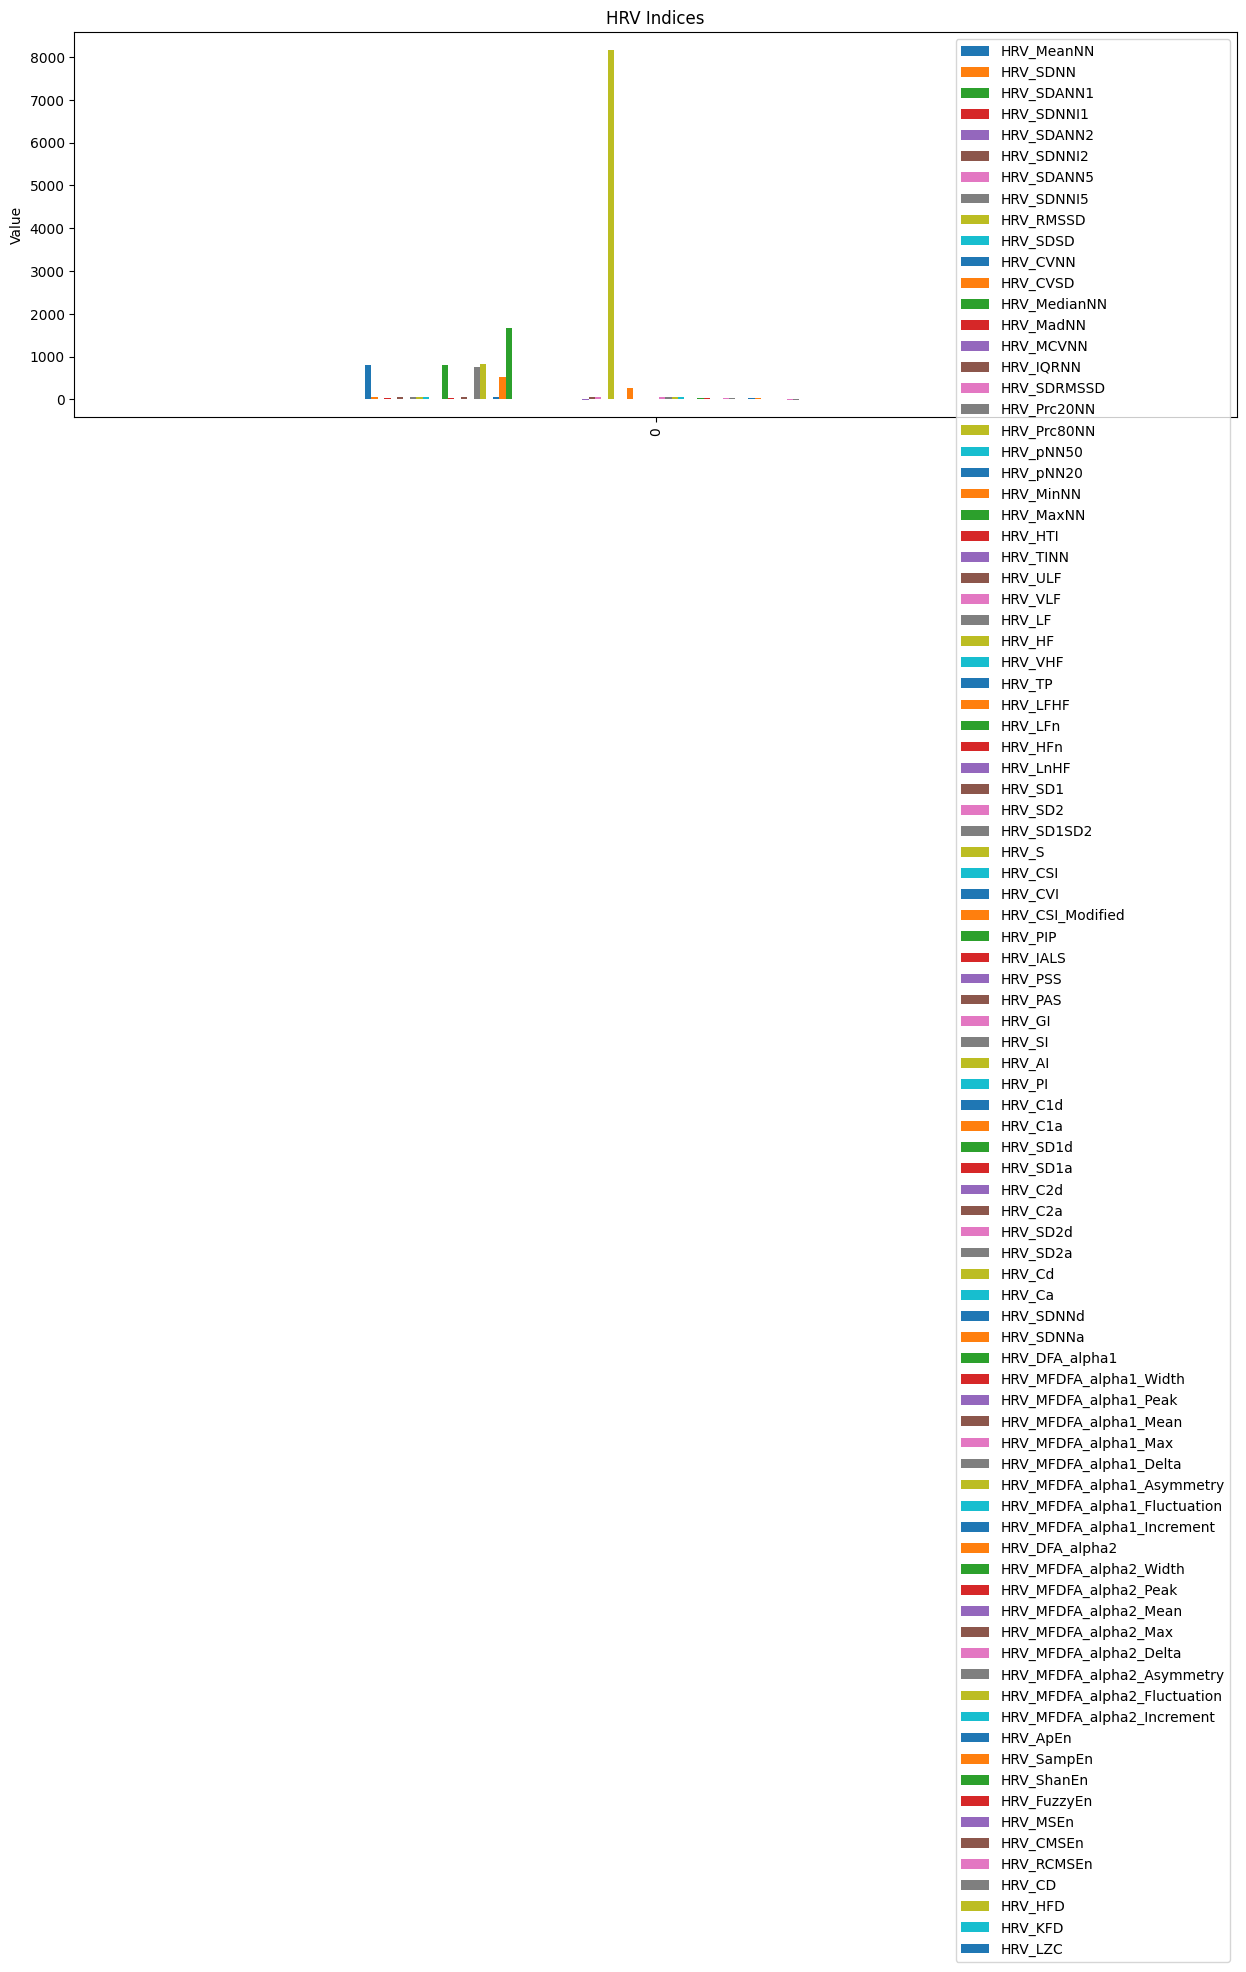

In [34]:
# Plot HRV indices
hrv_indices.plot(kind='bar', figsize=(15, 5))
plt.title('HRV Indices')
plt.ylabel('Value')
plt.show()

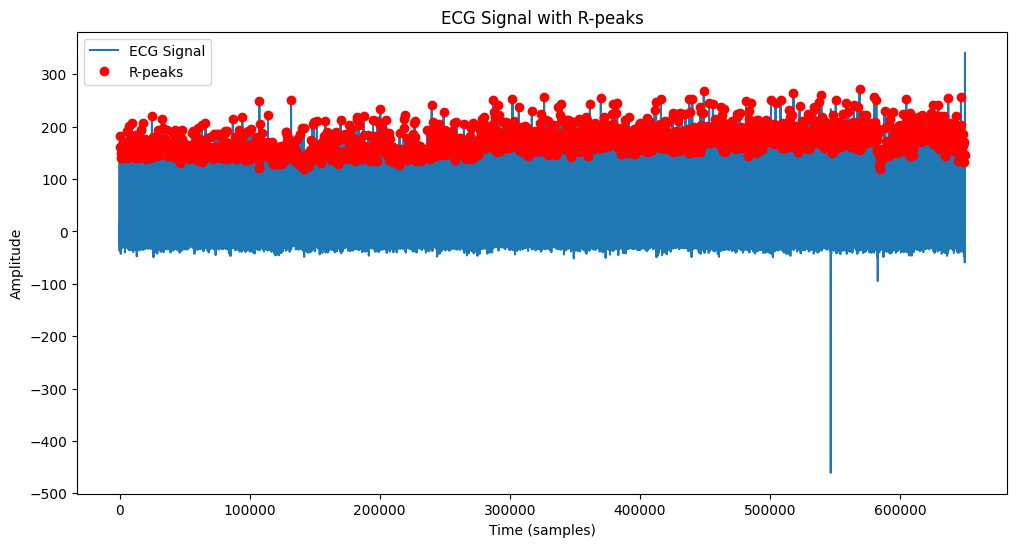

In [33]:
import matplotlib.pyplot as plt

# Plot ECG signal with R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_cleaned, label='ECG Signal')
plt.plot(r_peaks_indices, ecg_cleaned[r_peaks_indices], 'ro', label='R-peaks')
plt.legend()
plt.title('ECG Signal with R-peaks')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()
